<a href="https://colab.research.google.com/github/LAKSHAYRATRA/Machine_Learning/blob/main/Ridge_and_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
from sklearn.datasets import fetch_california_housing
housing_data=fetch_california_housing()

In [3]:
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
dataset=pd.DataFrame(housing_data.data)

In [5]:
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [6]:
dataset.columns=housing_data.feature_names

In [7]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
null_counts = dataset.isnull().sum()
null_counts

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


In [9]:
na_counts=dataset.isna().sum()
na_counts

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


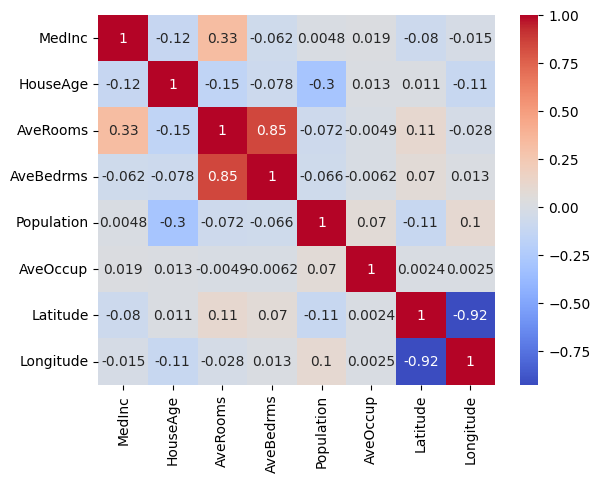

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()


In [11]:
dataset = dataset.drop(columns=['Latitude'])


In [12]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,-121.32


In [13]:
new_dataset=dataset.copy()
new_dataset['target']=housing_data.target

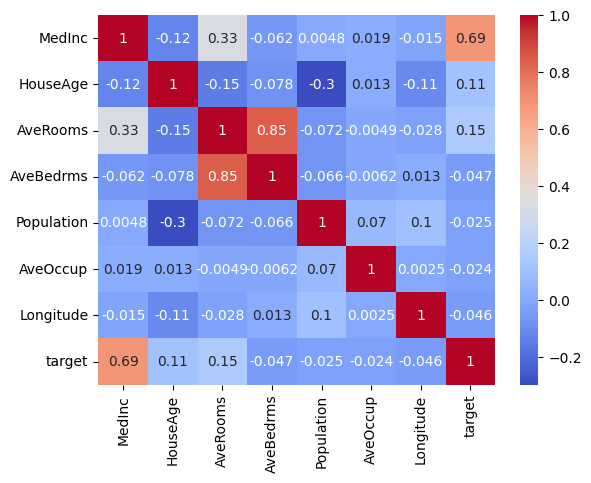

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(new_dataset.corr(), annot=True, cmap='coolwarm')
plt.show()


In [15]:
new_dataset.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,-122.25,2.611


In [16]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,-122.25
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,-121.32


In [17]:
new_dataset['HouseSize'] = (new_dataset['AveRooms'] - new_dataset['AveBedrms'])* new_dataset['AveOccup']

In [18]:
new_dataset['PopPerHouse'] = new_dataset['Population'] / new_dataset['AveOccup']

In [19]:
new_dataset['LogPopulation'] = np.log1p(new_dataset['Population'])

In [20]:
new_dataset['LogTarget'] = np.log1p(new_dataset['target'])

In [21]:
new_dataset= new_dataset.drop(columns=['PopPerHouse'])


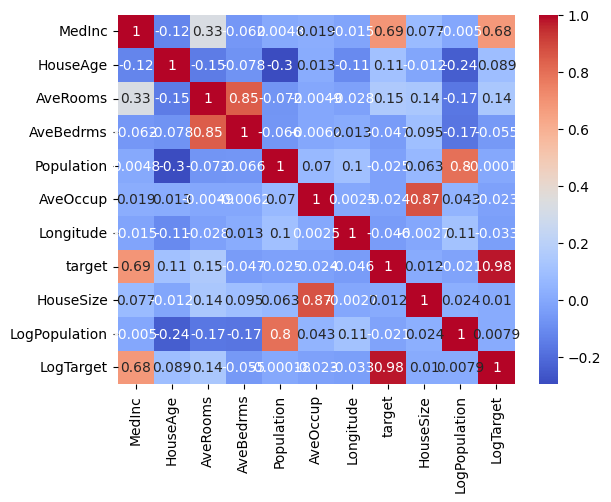

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(new_dataset.corr(), annot=True, cmap='coolwarm')
plt.show()


In [23]:
corr_matrix =new_dataset.corr()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
new_dataset.drop(columns=to_drop, inplace=True)

In [24]:
new_dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude,target,HouseSize,LogPopulation
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,-122.23,4.526,15.231922,5.777652
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,-122.22,3.585,11.110968,7.784057
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,-122.24,3.521,20.217434,6.208590
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,-122.25,3.413,12.088197,6.326149
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,-122.25,3.422,11.345314,6.338594
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,-121.09,0.781,10.017401,6.740519
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,-121.21,0.771,14.983995,5.877736
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,-121.22,0.923,9.501267,6.915723
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,-121.32,0.847,8.827440,6.609349


In [25]:
dataset=dataset.drop(columns=['AveBedrms'])
dataset=dataset.drop(columns=['Population'])
dataset=dataset.drop(columns=['AveOccup'])

In [26]:
#independent and dependent features
X=dataset
y=housing_data.target

In [27]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [28]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
X_train

,MedInc,HouseAge,AveRooms,Longitude
7061,4.1312,35.0,5.882353,-118.02
14689,2.8631,20.0,4.401210,-117.09
17323,4.2026,24.0,5.617544,-120.14
10056,3.1094,14.0,5.869565,-121.00
15750,3.3068,52.0,4.801205,-122.45
...,...,...,...,...
11284,6.3700,35.0,6.129032,-117.96
11964,3.0500,33.0,6.868597,-117.43
5390,2.9344,36.0,3.986717,-118.38
860,5.7192,15.0,6.395349,-121.96


In [30]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
X_train=scaler.fit_transform(X_train)

In [32]:
X_test=scaler.transform(X_test)

In [33]:
scaler.inverse_transform(X_train)

array([[   4.1312    ,   35.        ,    5.88235294, -118.02      ],
       [   2.8631    ,   20.        ,    4.40120968, -117.09      ],
       [   4.2026    ,   24.        ,    5.61754386, -120.14      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727, -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884, -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649, -122.42      ]])

In [34]:
from sklearn.linear_model import LinearRegression

## cross validation
from sklearn.model_selection import cross_val_score

In [35]:
regression=LinearRegression()
regression.fit(X_train,y_train)
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [36]:
mean=np.mean(mse)

In [37]:
##prediction
reg_pred=regression.predict(X_test)

In [38]:
reg_pred

array([1.06588054, 1.50757966, 2.35270622, ..., 1.72390398, 1.6764697 ,
       1.55146007])

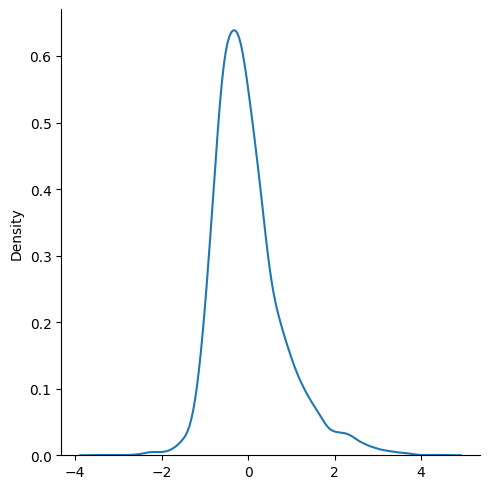

In [39]:
import seaborn as sns
sns.displot(y_test-reg_pred,kind='kde')

In [40]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)

In [41]:
score

0.5127638032179584

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [43]:
ridge_regressor=Ridge()

In [47]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [49]:
print(ridgecv.best_params_)

{'alpha': 90}


In [50]:
print(ridgecv.best_score_)

-0.6592520808202175


In [52]:
ridge_pred=ridgecv.predict(X_test)

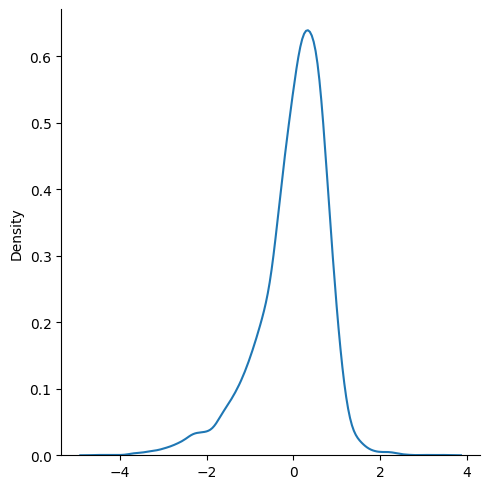

In [55]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [56]:
score=r2_score(ridge_pred,y_test)

In [57]:
score

0.03168893186986288

In [58]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [59]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [60]:
lasso_pred=lassocv.predict(X_test)

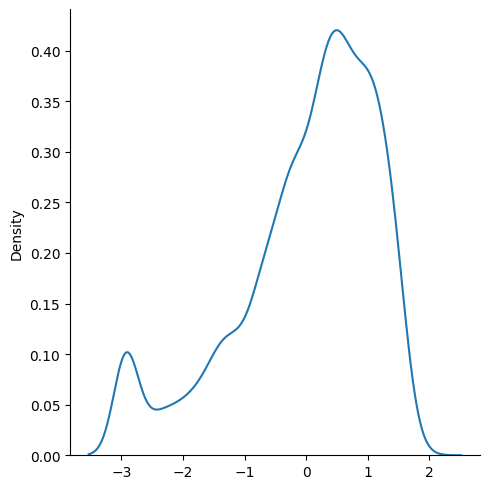

In [62]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')

In [63]:
score=r2_score(ridge_pred,y_test)

In [64]:
score

0.03168893186986288